### Importing Required Libraries

In [1]:
import joblib
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

### Fetching Datasets

In [2]:
df1 = pd.read_csv('MODIS_DATA/modis_2021_India.csv')
df2 = pd.read_csv('MODIS_DATA/modis_2022_India.csv')
df3 = pd.read_csv('MODIS_DATA/modis_2023_India.csv')

In [3]:
# print last 5 rows.  || df1.head()- print first 5 rows
df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
111262,21.1066,72.6336,307.9,1.5,1.2,2021-12-31,1703,Terra,MODIS,73,6.03,290.5,16.1,N,2
111263,19.1224,76.7451,303.2,1.0,1.0,2021-12-31,1703,Terra,MODIS,54,6.03,288.0,6.5,N,0
111264,19.2367,76.9620,304.1,1.0,1.0,2021-12-31,1703,Terra,MODIS,59,6.03,288.2,7.2,N,0
111265,23.7817,86.3960,306.2,1.2,1.1,2021-12-31,1954,Aqua,MODIS,65,6.03,287.8,10.8,N,2
111266,20.7973,85.2590,302.6,1.2,1.1,2021-12-31,1955,Aqua,MODIS,50,6.03,289.1,8.4,N,2


In [4]:
df2.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
81520,29.9033,74.9521,303.3,2.7,1.6,2022-12-31,1726,Terra,MODIS,55,6.03,281.3,37.2,N,0
81521,29.9086,74.9460,323.9,2.7,1.6,2022-12-31,1726,Terra,MODIS,100,6.03,282.0,106.5,N,0
81522,29.9170,74.9576,323.5,1.9,1.3,2022-12-31,2127,Aqua,MODIS,100,6.03,274.6,66.9,N,0
81523,21.1048,72.6415,302.9,2.0,1.4,2022-12-31,2130,Aqua,MODIS,52,6.03,289.9,18.5,N,2
81524,21.1137,72.6380,302.7,2.0,1.4,2022-12-31,2130,Aqua,MODIS,51,6.03,290.1,18.3,N,2


In [5]:
df3.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
78420,17.1067,74.4049,304.0,2.3,1.5,2023-12-31,1715,Terra,MODIS,58,61.03,289.2,23.2,N,0
78421,16.3284,75.2590,304.2,2.6,1.5,2023-12-31,1715,Terra,MODIS,59,61.03,288.9,29.5,N,0
78422,21.1095,72.6422,306.5,1.9,1.3,2023-12-31,1716,Terra,MODIS,68,61.03,294.2,18.2,N,2
78423,21.0664,72.8734,310.0,1.0,1.0,2023-12-31,2125,Aqua,MODIS,79,61.03,292.7,10.2,N,2
78424,21.0679,72.8637,316.9,1.0,1.0,2023-12-31,2125,Aqua,MODIS,94,61.03,293.1,16.0,N,2


In [6]:
# combines multiple DataFrames into a single unified DataFrame
df = pd.concat([df1,df2,df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [7]:
# no. of rows and columns
df.shape

(271217, 15)

In [8]:
# data types and memory allocation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [9]:
# any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [10]:
# to check duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
# List out column names
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [12]:
# statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [13]:
# check unique values of target
# 0 = vegitation fire, 1 = active volcanoes, 2 = static, 3 = offshore
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [14]:
#Check unique values and number of unique values for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


Box plots and graphs :

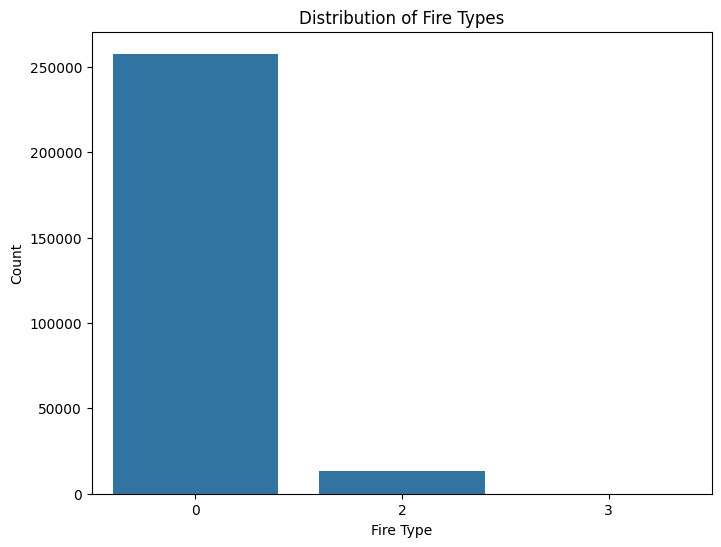

In [15]:
# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

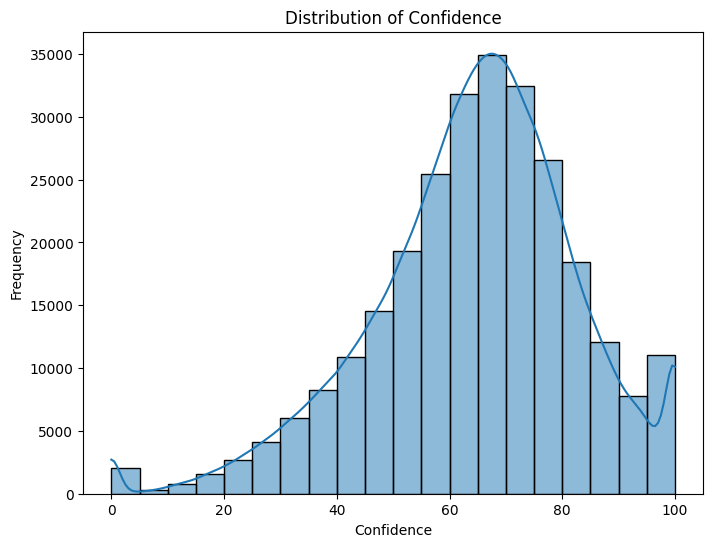

In [16]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

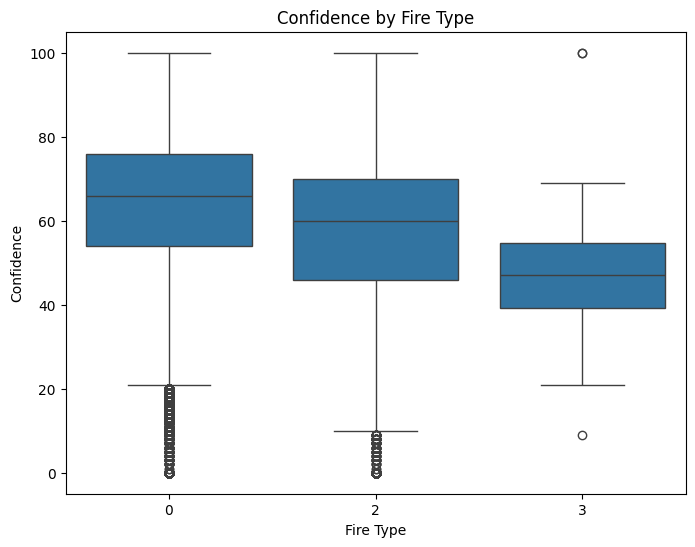

In [17]:
# Box plot for 'confidence' by 'type'
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='confidence', data=df)
plt.title('Confidence by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Confidence')
plt.show()

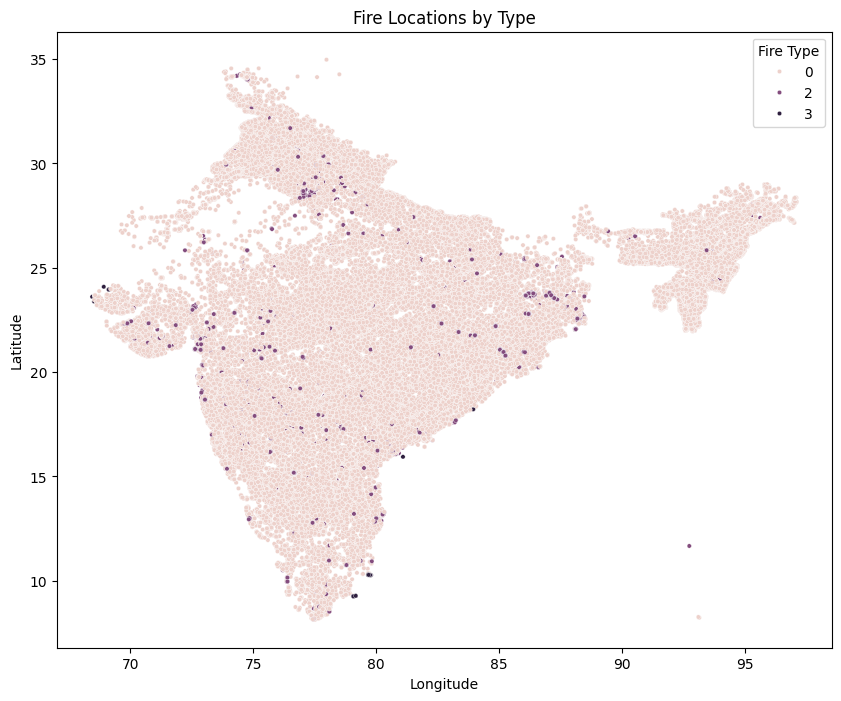

In [18]:
# Scatter plot of 'latitude' vs 'longitude'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='type', s=10)
plt.title('Fire Locations by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Type')
plt.show()

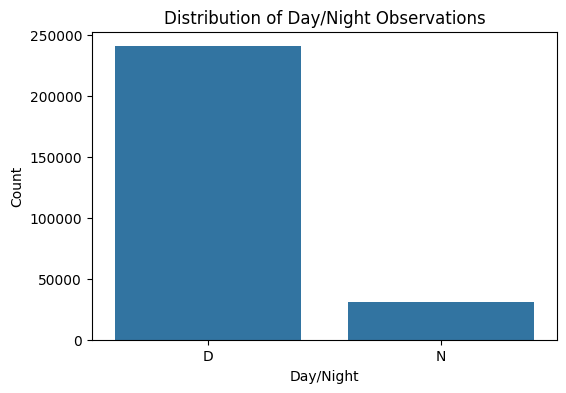

In [19]:
# Count plot for 'daynight'
plt.figure(figsize=(6, 4))
sns.countplot(x='daynight', data=df)
plt.title('Distribution of Day/Night Observations')
plt.xlabel('Day/Night')
plt.ylabel('Count')
plt.show()

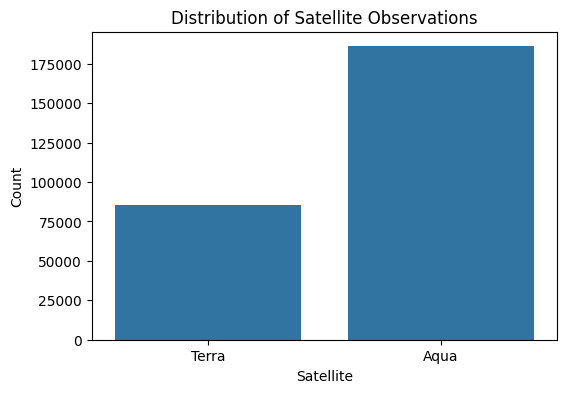

In [20]:
# Count plot for 'Satellite'
plt.figure(figsize=(6, 4))
sns.countplot(x='satellite', data=df)
plt.title('Distribution of Satellite Observations')
plt.xlabel('Satellite')
plt.ylabel('Count')
plt.show()

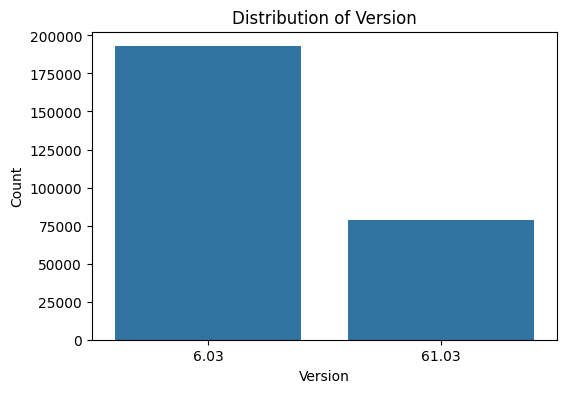

In [21]:
# Count plot for 'version'
plt.figure(figsize=(6, 4))
sns.countplot(x='version', data=df)
plt.title('Distribution of Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()

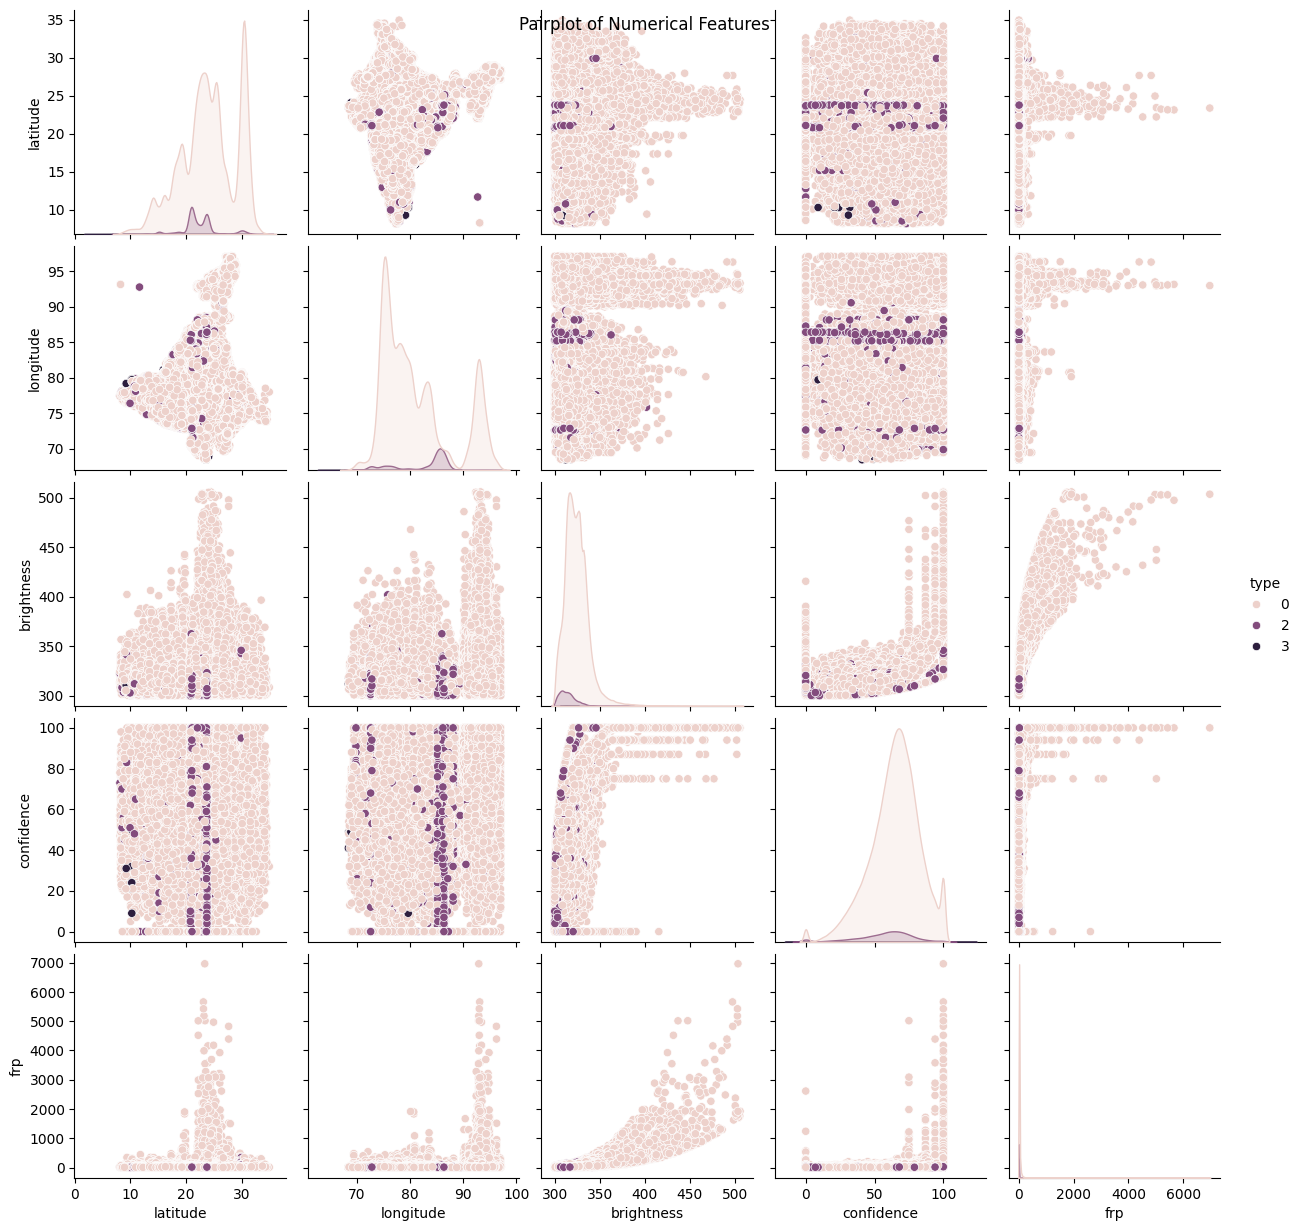

In [22]:
#Pairplot for numerical features (subset)
sns.pairplot(df[['latitude', 'longitude', 'brightness', 'confidence', 'frp', 'type']], hue='type', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

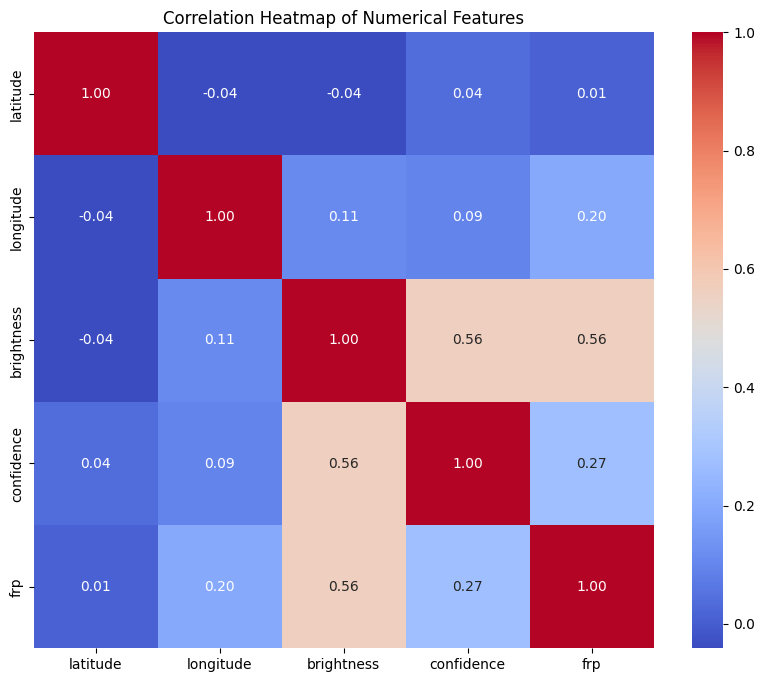

In [23]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['latitude', 'longitude', 'brightness', 'confidence', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [24]:
# To get all columns with only mnumbers
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

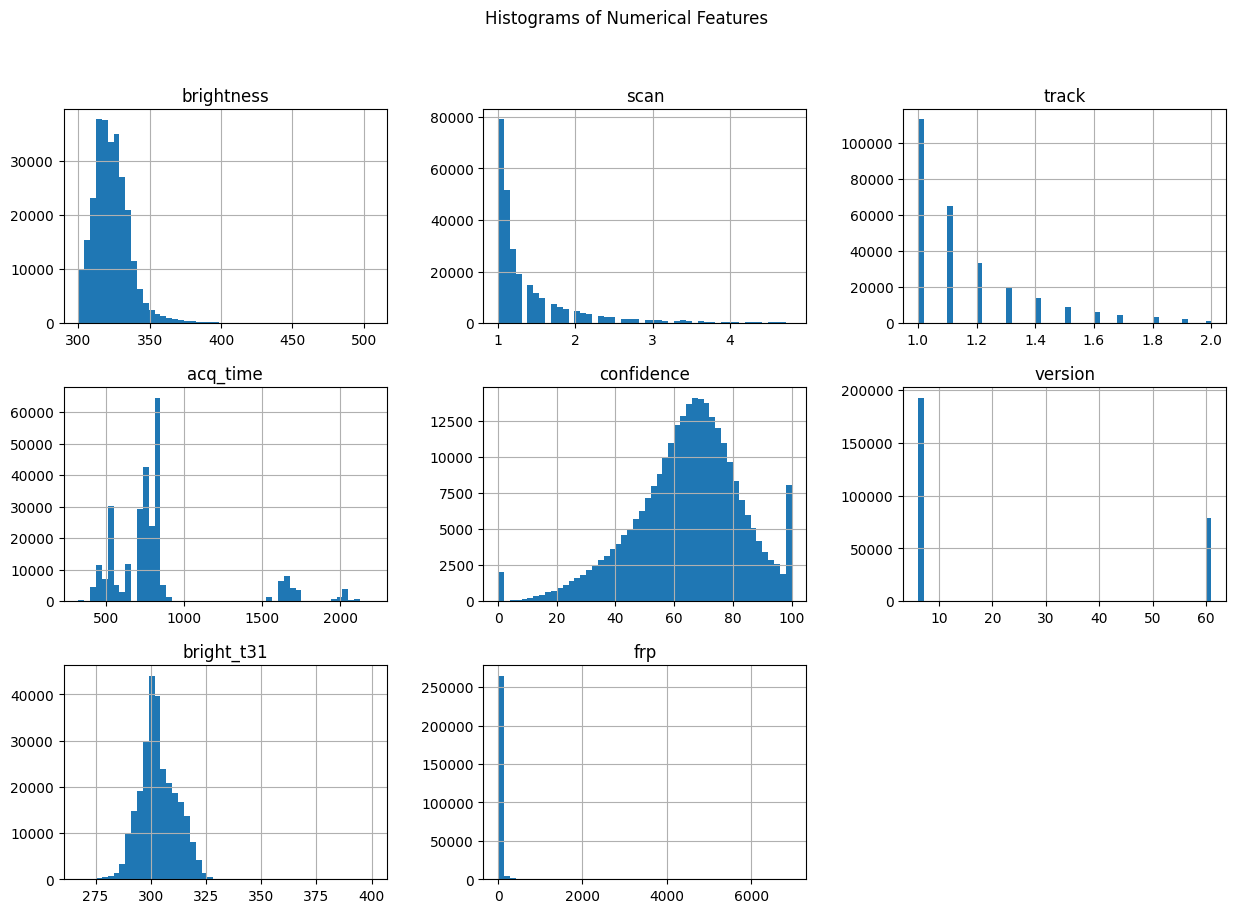

In [25]:
# Histograms of Numerical Features of all columns with only numbers 
numerical_cols = ['brightness', 'scan', 'track', 'acq_time','confidence', 'version', 'bright_t31', 'frp']
df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Analyzing distribution for: brightness


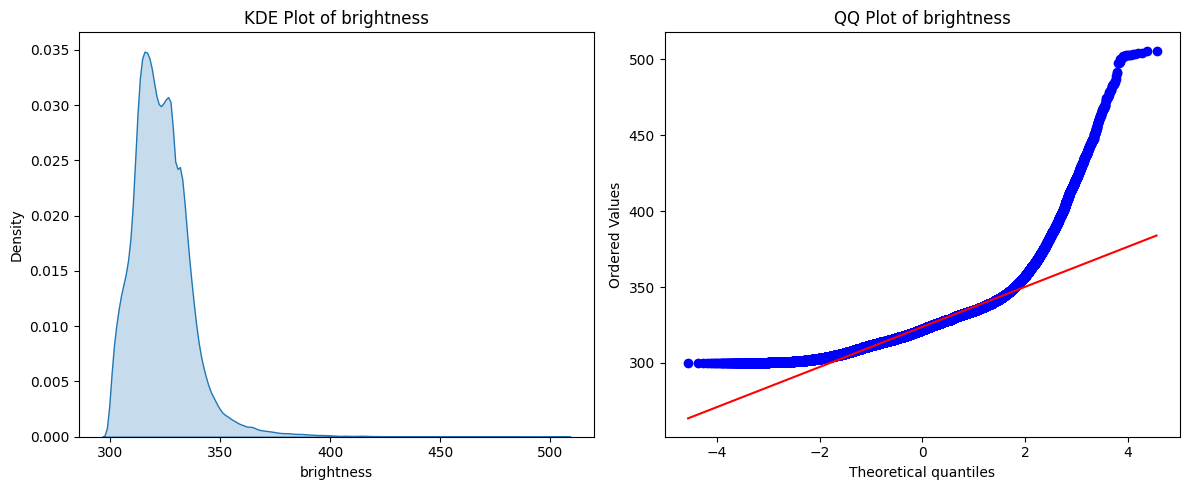

--------------------------------------------------
Analyzing distribution for: confidence


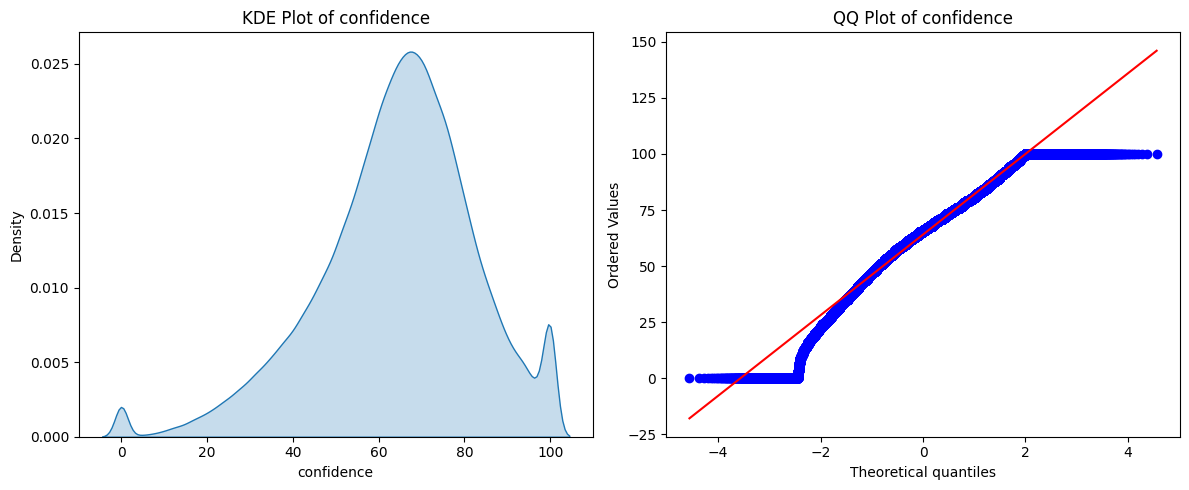

--------------------------------------------------
Analyzing distribution for: frp


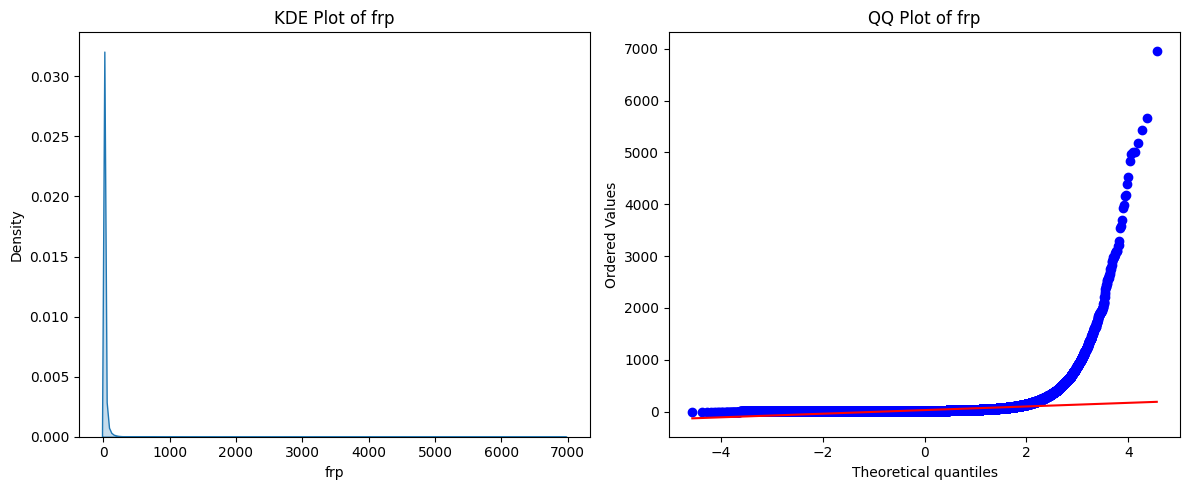

--------------------------------------------------
Analyzing distribution for: bright_t31


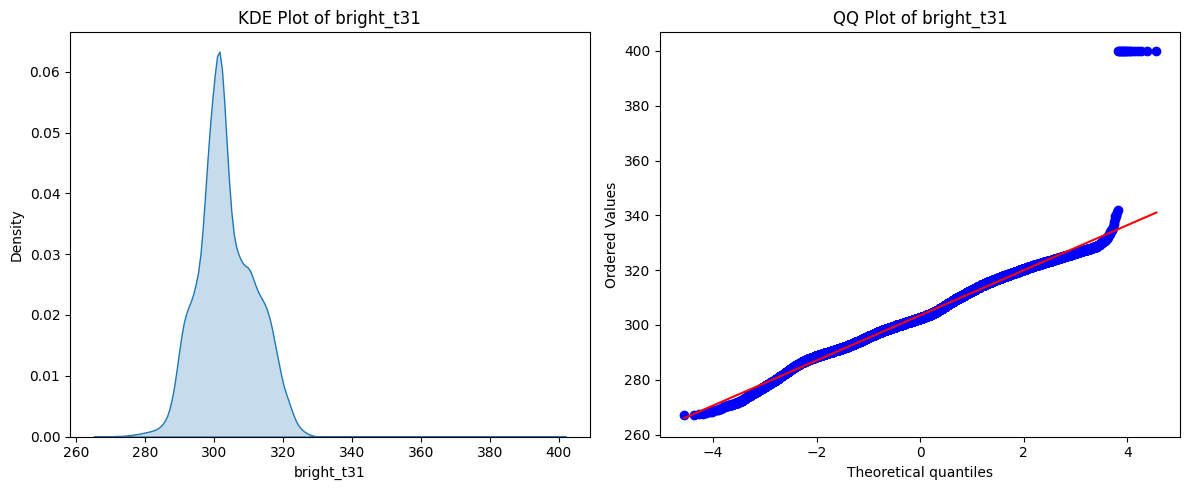

--------------------------------------------------
Analyzing distribution for: scan


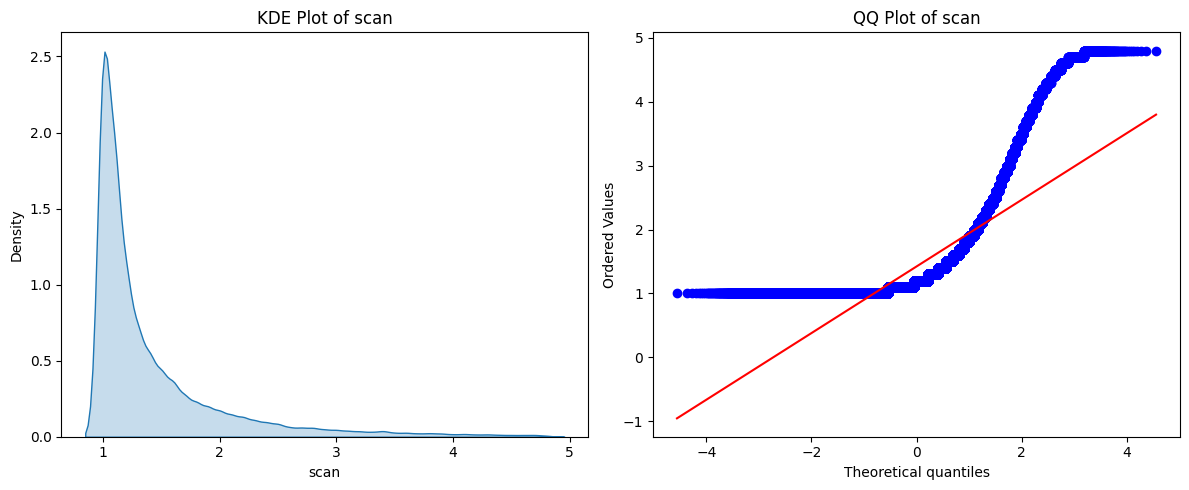

--------------------------------------------------
Analyzing distribution for: track


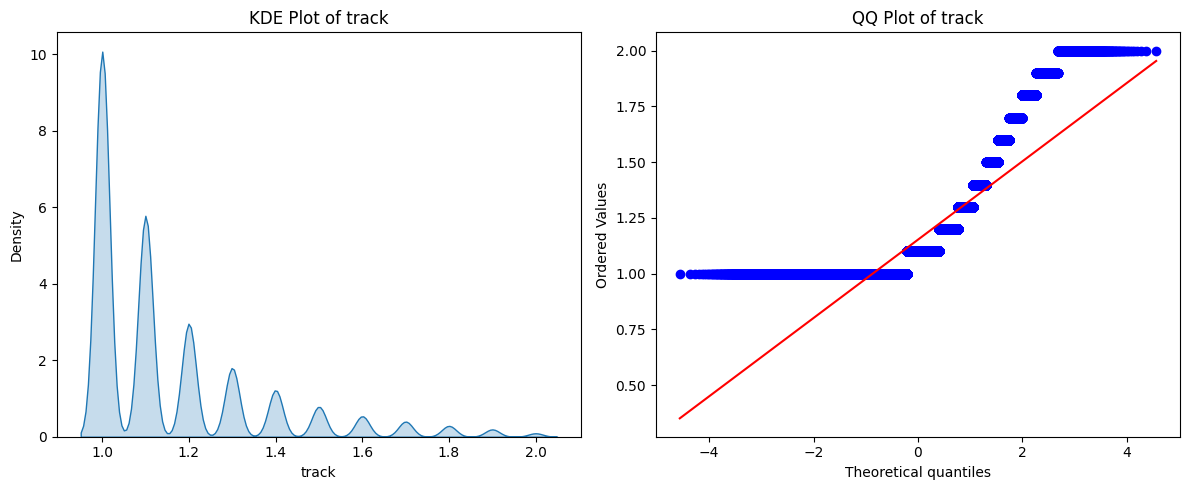

--------------------------------------------------


In [26]:
# List of numerical features to check for distribution
numerical_features = ['brightness', 'confidence', 'frp', 'bright_t31', 'scan', 'track']

for feature in numerical_features:
    print(f"Analyzing distribution for: {feature}")

    # KDE Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # QQ Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')

    plt.tight_layout()
    plt.show()
    print("-" * 50)

In [27]:
# --- Temporal Analysis ---

# Convert 'acq_date' to datetime objects
df['acq_date'] = pd.to_datetime(df['acq_date'])


# Extract temporal features
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day_of_week'] = df['acq_date'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_year'] = df['acq_date'].dt.dayofyear
df['hour'] = df['acq_time'].astype(str).str[:2].astype(int) # Assuming acq_time is HHMM

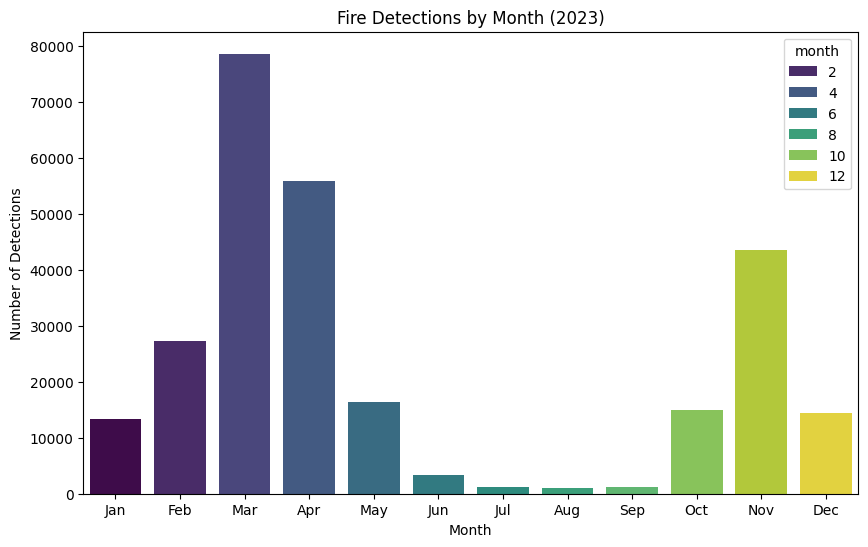

In [28]:
# Visualize fire detections over months
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', hue="month" , palette='viridis')
plt.title('Fire Detections by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

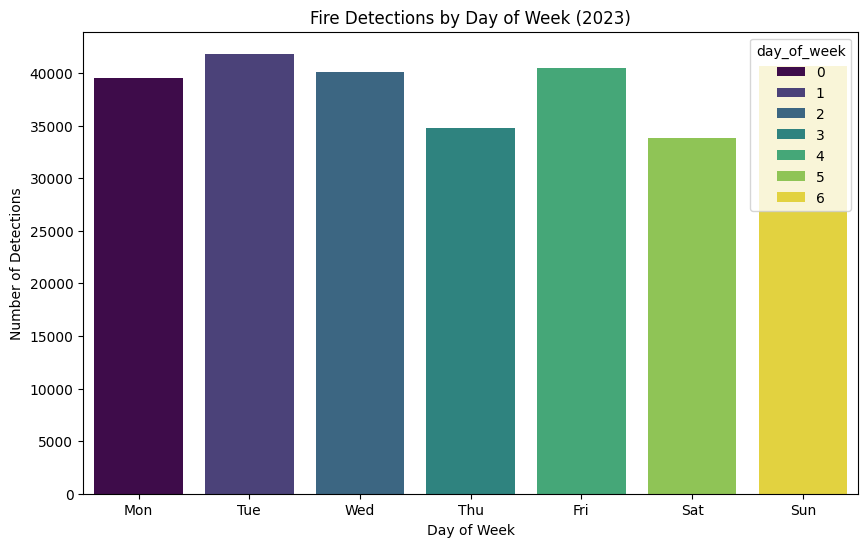

In [29]:
# Visualize fire detections by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue="day_of_week", palette='viridis')
plt.title('Fire Detections by Day of Week (2023)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Outlier detection and treatment :

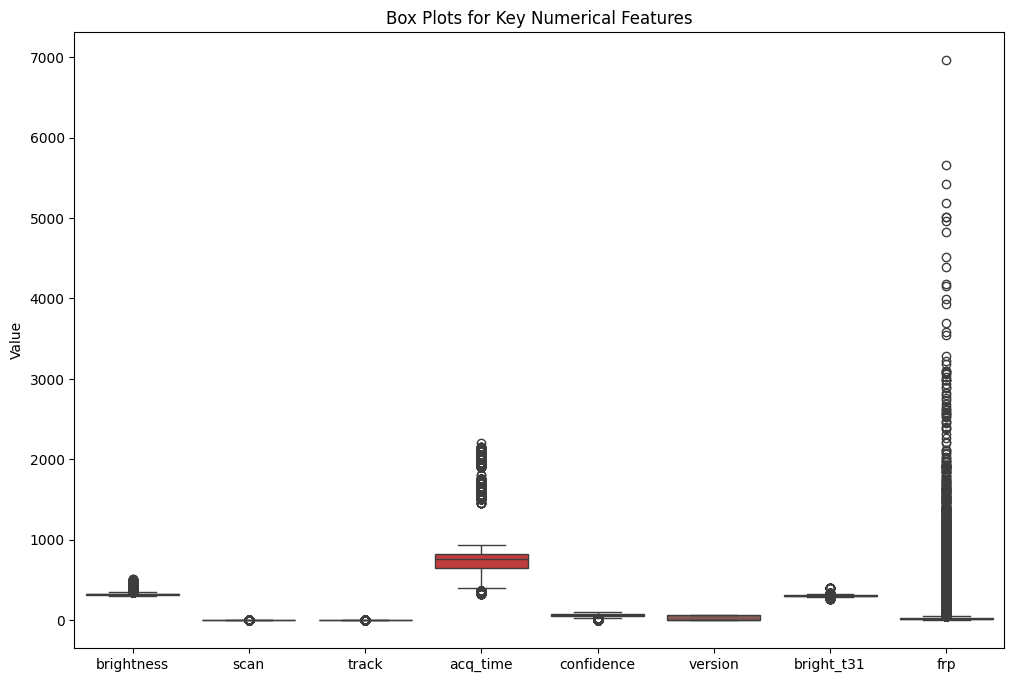

In [30]:
# Visualize outliers using box plots for key numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Key Numerical Features')
plt.ylabel('Value')
plt.show()

In [31]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Apply outlier removal to numerical columns
for col in numerical_cols:
  df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (189370, 20)


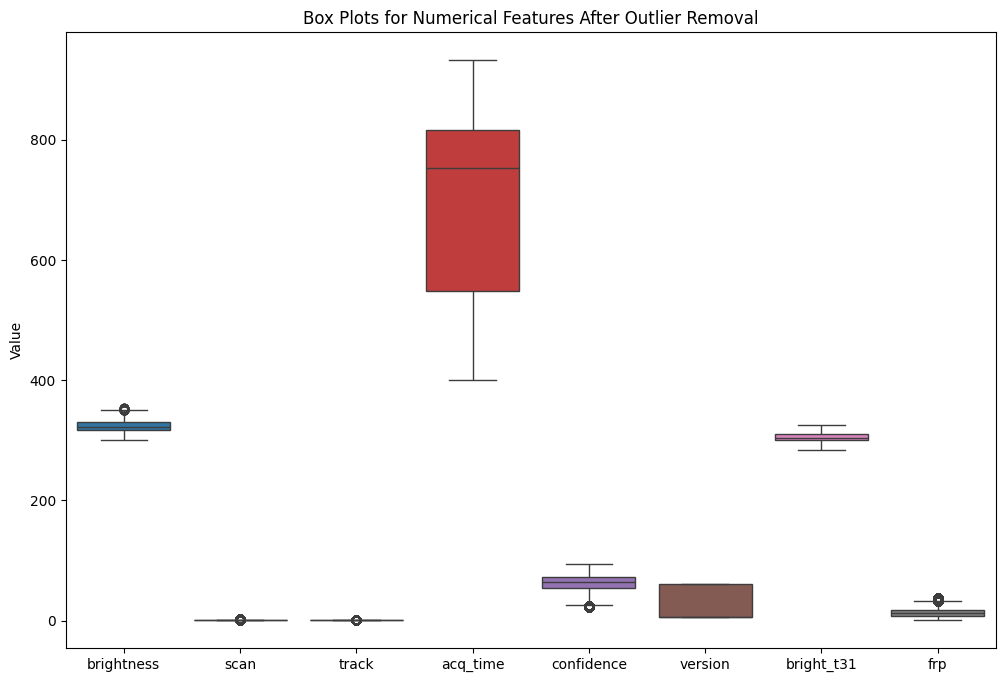

In [32]:
# Visualize box plots after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.show()

In [33]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day_of_week,day_of_year,hour
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0,2021,1,4,1,40
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0,2021,1,4,1,54
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0,2021,1,4,1,54
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0,2021,1,4,1,54
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,Terra,MODIS,36,6.03,287.2,5.3,D,0,2021,1,4,1,54


In [34]:
df.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

In [35]:
categorical_cols = df.select_dtypes(include='object').columns

In [36]:
categorical_cols

Index(['satellite', 'instrument', 'daynight'], dtype='object')

In [37]:
# Select categorical columns for encoding
categorical_cols_to_encode = ['daynight', 'satellite', 'instrument']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=False)

In [38]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,44,6.03,292.6,...,0,2021,1,4,1,40,True,False,True,True
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,37,6.03,287.4,...,0,2021,1,4,1,54,True,False,True,True
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,46,6.03,287.7,...,0,2021,1,4,1,54,True,False,True,True
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,43,6.03,287.6,...,0,2021,1,4,1,54,True,False,True,True
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,36,6.03,287.2,...,0,2021,1,4,1,54,True,False,True,True


In [39]:
df_encoded.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

In [40]:
## Create map with sample data of only 10000 datas
#india_map = folium.Map(location=[22.351115, 78.667743], zoom_start=5)
#sample_df = df_encoded.sample(n=min(10000, len(df_encoded)), random_state=42)

## Add markers
#for _, row in sample_df.iterrows():
#    folium.CircleMarker(
#        location=[row['latitude'], row['longitude']],
#        radius=3,
#        color='red',
#        fill=True,
#        fill_opacity=0.6,
#        popup=f"FRP: {row['frp']:.2f}, Date: {row['acq_date'].strftime('%Y-%m-%d')}"
#    ).add_to(india_map)

#display(india_map)

### Normalisation of continuous variable

In [41]:
scaler = StandardScaler()
numerical_cols_to_scale = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,...,0,2021,1,4,1,40,True,False,True,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,...,0,2021,1,4,1,54,True,False,True,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,...,0,2021,1,4,1,54,True,False,True,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,...,0,2021,1,4,1,54,True,False,True,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,...,0,2021,1,4,1,54,True,False,True,True


In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189370 entries, 0 to 271207
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   latitude          189370 non-null  float64       
 1   longitude         189370 non-null  float64       
 2   brightness        189370 non-null  float64       
 3   scan              189370 non-null  float64       
 4   track             189370 non-null  float64       
 5   acq_date          189370 non-null  datetime64[ns]
 6   acq_time          189370 non-null  int64         
 7   confidence        189370 non-null  float64       
 8   version           189370 non-null  float64       
 9   bright_t31        189370 non-null  float64       
 10  frp               189370 non-null  float64       
 11  type              189370 non-null  int64         
 12  year              189370 non-null  int32         
 13  month             189370 non-null  int32         
 14  day_of_we

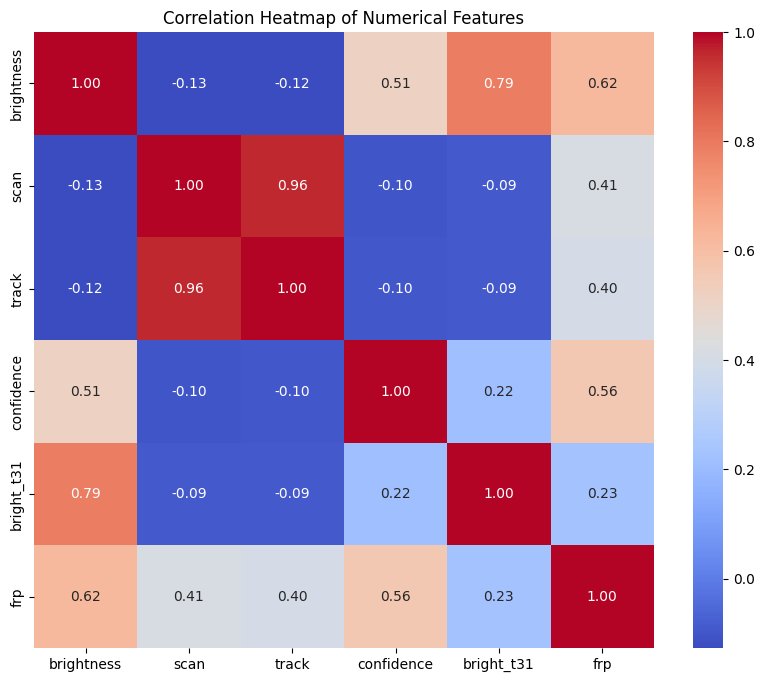

In [43]:
#Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded [['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [44]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,...,type,year,month,day_of_week,day_of_year,hour,daynight_D,satellite_Aqua,satellite_Terra,instrument_MODIS
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,...,0,2021,1,4,1,40,True,False,True,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,...,0,2021,1,4,1,54,True,False,True,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,...,0,2021,1,4,1,54,True,False,True,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,...,0,2021,1,4,1,54,True,False,True,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,...,0,2021,1,4,1,54,True,False,True,True


In [45]:
df_encoded.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

In [46]:
#Separate features (X) and target variable (y)
#Assuming 'type' is the target variable you want to predict
#Drop temporal features if not intended for prediction task that uses 'type' as target
features = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
target = 'type'
X = df_encoded[features]
y = df_encoded[target]


In [47]:
X

,brightness,scan,track,confidence,bright_t31,frp
0,-2.308455,-0.464860,0.059274,-1.319370,-1.754135,-0.735900
1,-2.445530,0.588678,0.936416,-1.818736,-2.471213,-0.683381
3,-2.422684,0.939857,0.936416,-1.176694,-2.429843,-0.460175
4,-2.548336,0.237499,0.059274,-1.390708,-2.443633,-0.683381
6,-2.594027,-0.816039,-0.817867,-1.890074,-2.498792,-1.169182
...,...,...,...,...,...,...
271199,-0.423680,1.642216,1.813557,-0.605991,0.369517,0.327610
271200,-0.846327,3.398112,2.690698,-1.319370,-0.085551,0.209442
271201,-0.789212,1.993395,1.813557,-1.105356,-0.306191,-0.079412
271204,-0.115262,1.993395,1.813557,0.678093,0.093718,1.679975


In [48]:
y

0         0
1         0
3         0
4         0
6         0
         ..
271199    0
271200    0
271201    0
271204    0
271207    0
Name: type, Length: 189370, dtype: int64

In [49]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

#Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

#Check the distribution of the target variable after resampling 
print("Distribution of target variable after SMOTE:")
print(y_resampled.value_counts())
0.15

Distribution of target variable after SMOTE:
type
0    182841
2    182841
3    182841
Name: count, dtype: int64


0.15

In [50]:
# Split the dataset into training and testing sets
# You can adjust the test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

In [51]:
# no. of rows and columns
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (411392, 6)
Shape of X_test: (137131, 6)
Shape of y_train: (411392,)
Shape of y_test: (137131,)


In [52]:
# Import Logistic Regression to train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train,y_train)
loreg_pred = loreg.predict(X_test)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.5858
              precision    recall  f1-score   support

           0       0.62      0.51      0.56     45710
           2       0.48      0.48      0.48     45710
           3       0.65      0.76      0.70     45711

    accuracy                           0.59    137131
   macro avg       0.58      0.59      0.58    137131
weighted avg       0.58      0.59      0.58    137131



In [53]:
# Import Decision Tree Classifier to train from SKlearn
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9504
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     45710
           2       0.92      0.93      0.93     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.95    137131
   macro avg       0.95      0.95      0.95    137131
weighted avg       0.95      0.95      0.95    137131



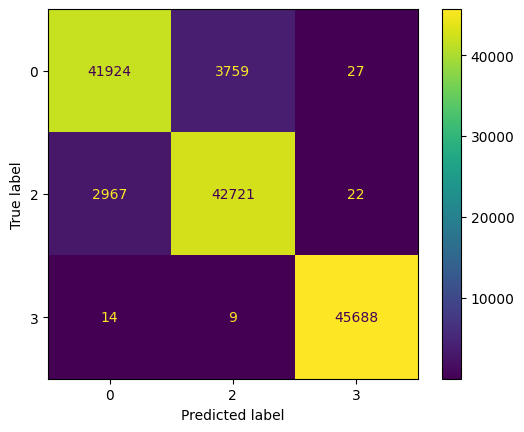

In [54]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)

In [55]:
# Import Random Forest Classifier to train from SKlearn
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9777
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     45710
           2       0.96      0.97      0.97     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.98    137131
   macro avg       0.98      0.98      0.98    137131
weighted avg       0.98      0.98      0.98    137131



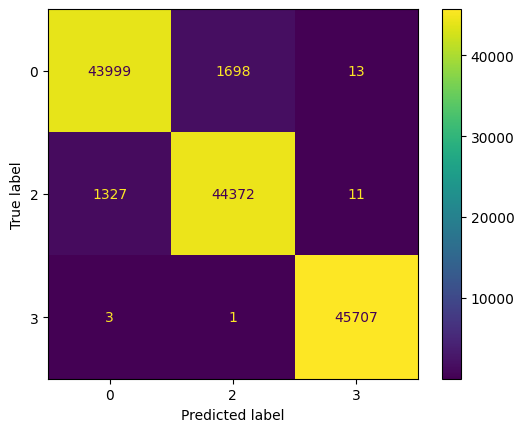

In [56]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [57]:
# KNeighborsClassifier to Train from SKlearn
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)
knn_pred = knnc.predict(X_test)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9311
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     45710
           2       0.84      0.98      0.91     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.93    137131
   macro avg       0.94      0.93      0.93    137131
weighted avg       0.94      0.93      0.93    137131



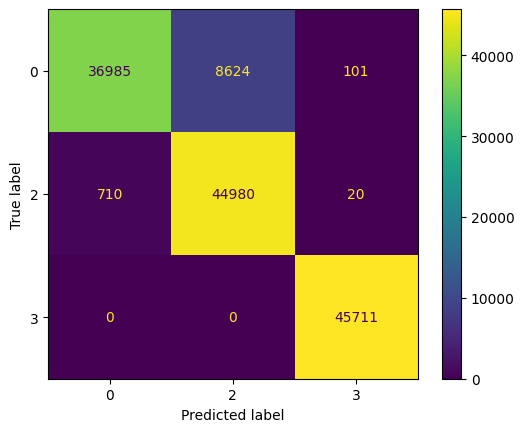

In [58]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test, y_test)

In [59]:
# Collect the accuracies of each model
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, loreg_pred),
    "Decision Tree": accuracy_score(y_test, dtc_pred),
    "Random Forest": accuracy_score(y_test, rfc_pred),
    "KNeighbors Classifier": accuracy_score(y_test, knn_pred)
}

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.5858
Decision Tree: 0.9504
Random Forest: 0.9777
KNeighbors Classifier: 0.9311

Best Model: Random Forest with Accuracy: 0.9777


In [60]:
# Based on the previous output, let's assume Random Forest was the best model.
best_model = rfc

joblib.dump(best_model, 'best_fire_detection_model.pkl')

# Save the StandardScaler instance
joblib.dump(scaler, 'scaler.pkl')

print("Best model and scaler saved successfully.")

Best model and scaler saved successfully.
